# MLE-GMM-with-Visualization
## Wanlin Ji

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import matplotlib.pyplot as plt
import scipy.optimize as opt

import scipy.stats as sts
from scipy.stats import lognorm

import seaborn as sns

import numpy.linalg as lin
import scipy.integrate as intgr

In [3]:
dt = np.loadtxt('heights.txt')
dt.shape
dt.max()

80.293980000000005

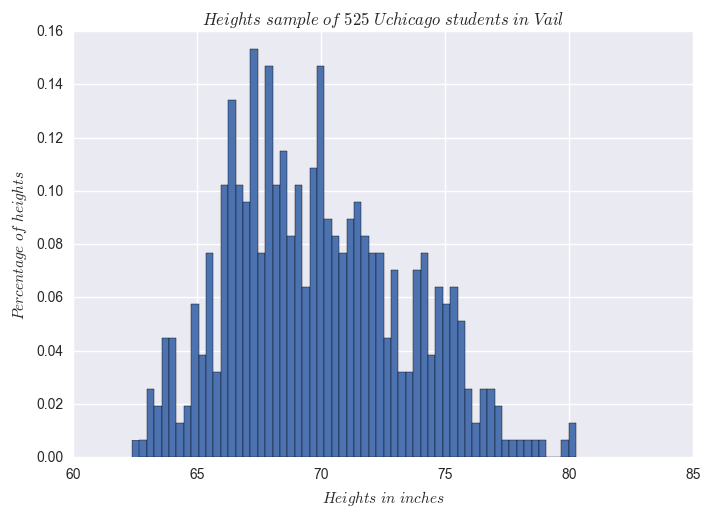

In [4]:
# (a) Creating the histogram with normed = True
fig, ax = plt.subplots()

def plt_dt():
    plt.hist(dt, 60, normed=True)

plt_dt()
plt.title(r'$Heights\ sample\ of\ 525\ Uchicago\ students\ in\ Vail$')
plt.xlabel(r'$Heights\ in\ inches$')
plt.ylabel(r'$Percentage\ of\ heights$')
plt.show()

In [37]:
# (b) MLE of normal distribution

def log_lik_norm(xvals, mu, sigma):
    '''
    --------------------------------------------------------------------
    Compute the log likelihood function for data xvals given normal
    distribution parameters mu and sigma.
    --------------------------------------------------------------------
    INPUTS:
    xvals  = (N,) vector, values of the normally distributed random
             variable
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    cutoff = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        norm_pdf()
    
    OBJECTS CREATED WITHIN FUNCTION:
    pdf_vals    = (N,) vector, normal PDF values for mu and sigma
                  corresponding to xvals data
    ln_pdf_vals = (N,) vector, natural logarithm of normal PDF values
                  for mu and sigma corresponding to xvals data
    log_lik_val = scalar, value of the log likelihood function
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: log_lik_val
    --------------------------------------------------------------------
    '''
    pdf_vals = sts.norm.pdf(xvals, loc = mu, scale = sigma)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val


def crit(params, *args):
    '''
    --------------------------------------------------------------------
    This function computes the negative of the log likelihood function
    given parameters and data. This is the minimization problem version
    of the maximum likelihood optimization problem
    --------------------------------------------------------------------
    INPUTS:
    params = (2,) vector, ([mu, sigma])
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    args   = length 2 tuple, (xvals, cutoff)
    xvals  = (N,) vector, values of the normally distributed random
             variable
    cutoff = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        log_lik_norm()
    
    OBJECTS CREATED WITHIN FUNCTION:
    log_lik_val = scalar, value of the log likelihood function
    neg_log_lik_val = scalar, negative of log_lik_val
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: neg_log_lik_val
    --------------------------------------------------------------------
    '''
    mu, sigma = params
    xvals = args
    log_lik_val = log_lik_norm(xvals, mu, sigma)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

print(dt.mean(), dt.std())

69.8769738361 3.52822114656


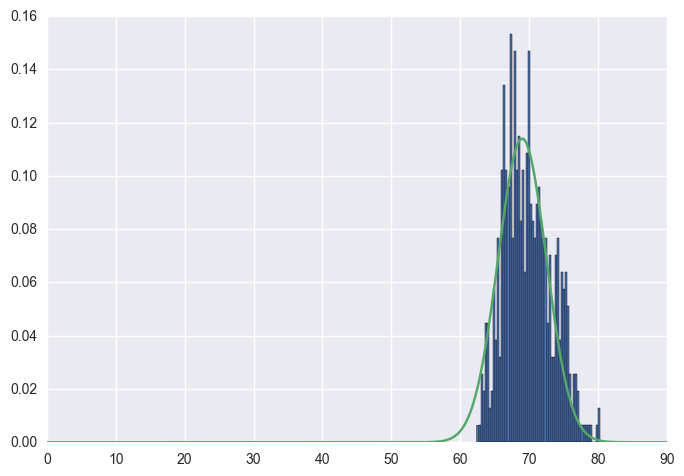

In [38]:
dist_pts = np.linspace(0, 90, 800)

# Test and guess
test_mu, test_sigma = 69, 3.5

fig, ax = plt.subplots()
plt.hist(dt, 60, normed = True)
plt.plot(dist_pts, sts.norm.pdf(dist_pts, loc = test_mu, scale = 
                                    test_sigma))
plt.show()

In [39]:
mu_init = 69
sig_init = 3.5
params_init = np.array([mu_init, sig_init])
mle_args = dt
results = opt.minimize(crit, params_init, args = mle_args)
mu_MLE, sig_MLE = results.x
print('mu_MLE=', mu_MLE, ' sig_MLE=', sig_MLE)

mu_MLE= 69.8769738596  sig_MLE= 3.5282211486


In [40]:
results

      fun: 1406.8594851405614
 hess_inv: array([[ 0.02686575,  0.00103039],
       [ 0.00103039,  0.01150635]])
      jac: array([ 0.,  0.])
  message: 'Optimization terminated successfully.'
     nfev: 44
      nit: 8
     njev: 11
   status: 0
  success: True
        x: array([ 69.87697386,   3.52822115])

In [42]:
print('The value of the likelihood function: ',
      log_lik_norm(dt, mu_MLE, sig_MLE))

The value of the likelihood function:  -1406.85948514


In [43]:
vcv_mle = results.hess_inv
print('VCV matrix:')
print(vcv_mle)

VCV matrix:
[[ 0.02686575  0.00103039]
 [ 0.00103039  0.01150635]]


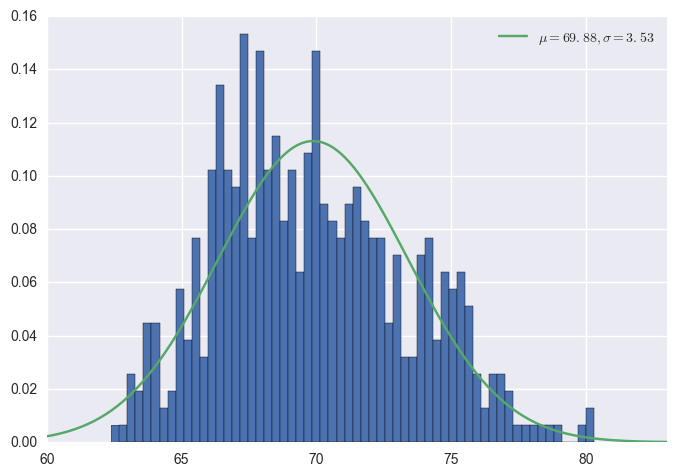

In [48]:
fig, ax = plt.subplots()
plt.hist(dt, 60, normed = True)
plt.plot(dist_pts, sts.norm.pdf(dist_pts, loc = mu_MLE, scale = sig_MLE),
            label = '$\mu = {:.2f}, \sigma = {:.2f}$'.format(mu_MLE, sig_MLE))
plt.legend(loc = 'best')
plt.xlim(60, 83)
plt.show()

In [52]:
print('Prob of shorter than 67 inches: ',
      sts.norm.cdf(67, loc = mu_MLE, scale = sig_MLE))
print('Prob of higher than 75 inches: ',
      1 - sts.norm.cdf(75, loc = mu_MLE, scale = sig_MLE))

Prob of shorter than 67 inches:  0.207416637339
Prob of higher than 75 inches:  0.0732488705494


In [62]:
# 2.
def trunc_norm_pdf(xvals, mu, sigma, cutoff):
    '''
    --------------------------------------------------------------------
    Generate pdf values from the truncated normal pdf with mean mu and
    standard deviation sigma. If the cutoff is finite, then the PDF
    values are inflated upward to reflect the zero probability on values
    above the cutoff. If there is no cutoff given or if it is given as
    infinity, this function does the same thing as
    sp.stats.norm.pdf(x, loc=mu, scale=sigma).
    --------------------------------------------------------------------
    INPUTS:
    xvals  = (N,) vector, values of the normally distributed random
             variable
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    cutoff = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION: None
    
    OBJECTS CREATED WITHIN FUNCTION:
    prob_notcut = scalar 
    pdf_vals = (N,) vector, normal PDF values for mu and sigma
               corresponding to xvals data
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: pdf_vals
    --------------------------------------------------------------------
    '''
    if cutoff == 'None':
        prob_notcut = 1.0
    else:
        prob_notcut = sts.norm.cdf(cutoff, loc=mu, scale=sigma)
            
    pdf_vals    = ((1/(sigma * np.sqrt(2 * np.pi)) *
                    np.exp( - (xvals - mu)**2 / (2 * sigma**2))) /
                    prob_notcut)
    
    return pdf_vals

def data_moments(xvals):
    '''
    --------------------------------------------------------------------
    This function computes the two data moments for GMM
    (mean(data), variance(data)).
    --------------------------------------------------------------------
    INPUTS:
    xvals = (N,) vector, test scores data
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION: None
    
    OBJECTS CREATED WITHIN FUNCTION:
    mean_data = scalar, mean value of test scores data
    var_data  = scalar > 0, variance of test scores data
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: mean_data, var_data
    --------------------------------------------------------------------
    '''
    mean_data = xvals.mean()
    var_data = xvals.var()
    
    return mean_data, var_data

def model_moments(mu, sigma, cutoff):
    '''
    --------------------------------------------------------------------
    This function computes the two model moments for GMM
    (mean(model data), variance(model data)).
    --------------------------------------------------------------------
    INPUTS:
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    cutoff = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        trunc_norm_pdf()
        xfx()
        x2fx()
    
    OBJECTS CREATED WITHIN FUNCTION:
    mean_model = scalar, mean value of test scores from model
    m_m_err    = scalar > 0, estimated error in the computation of the
                 integral for the mean of the distribution
    var_model  = scalar > 0, variance of test scores from model
    v_m_err    = scalar > 0, estimated error in the computation of the
                 integral for the variance of the distribution
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: mean_model, var_model
    --------------------------------------------------------------------
    '''
    xfx = lambda x: x * trunc_norm_pdf(x, mu, sigma, cutoff)
    (mean_model, m_m_err) = intgr.quad(xfx, -np.inf, cutoff)
    x2fx = lambda x: ((x - mean_model) ** 2) * trunc_norm_pdf(x, mu, sigma, cutoff) 
    (var_model, v_m_err) = intgr.quad(x2fx, -np.inf, cutoff)
    
    return mean_model, var_model

def err_vec(xvals, mu, sigma, cutoff, simple):
    '''
    --------------------------------------------------------------------
    This function computes the vector of moment errors (in percent
    deviation from the data moment vector) for GMM.
    --------------------------------------------------------------------
    INPUTS:
    xvals  = (N,) vector, test scores data
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    cutoff = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability
    simple = boolean, =True if errors are simple difference, =False if
             errors are percent deviation from data moments
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        data_moments()
        model_moments()
    
    OBJECTS CREATED WITHIN FUNCTION:
    mean_data  = scalar, mean value of data
    var_data   = scalar > 0, variance of data
    moms_data  = (2, 1) matrix, column vector of two data moments
    mean_model = scalar, mean value from model
    var_model  = scalar > 0, variance from model
    moms_model = (2, 1) matrix, column vector of two model moments
    err_vec    = (2, 1) matrix, column vector of two moment error
                 functions
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: err_vec
    --------------------------------------------------------------------
    '''
    mean_data, var_data = data_moments(xvals)
    moms_data = np.array([[mean_data], [var_data]])
    mean_model, var_model = model_moments(mu, sigma, cutoff)
    moms_model = np.array([[mean_model], [var_model]])
    if simple:
        err_vec = moms_model - moms_data
    else:
        err_vec = (moms_model - moms_data) / moms_data
    
    return err_vec


def criterion(params, *args):
    '''
    --------------------------------------------------------------------
    This function computes the GMM weighted sum of squared moment errors
    criterion function value given parameter values and an estimate of
    the weighting matrix.
    --------------------------------------------------------------------
    INPUTS:
    params = (2,) vector, ([mu, sigma])
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    args   = length 3 tuple, (xvals, cutoff, W_hat)
    xvals  = (N,) vector, values of the truncated normally distributed
             random variable
    cutoff = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability
    W_hat  = (R, R) matrix, estimate of optimal weighting matrix
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        norm_pdf()
    
    OBJECTS CREATED WITHIN FUNCTION:
    err        = (2, 1) matrix, column vector of two moment error
                 functions
    crit_val   = scalar > 0, GMM criterion function value
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: crit_val
    --------------------------------------------------------------------
    '''
    mu, sigma = params
    xvals, cutoff, W = args
    err = err_vec(xvals, mu, sigma, cutoff, simple=True)
    crit_val = np.dot(np.dot(err.T, W), err) 
    
    return crit_val



In [63]:
def data_moments4(xvals):
    '''
    --------------------------------------------------------------------
    This function computes the four data moments for GMM
    (binpct_1, binpct_2, binpct_3, binpct_4).
    --------------------------------------------------------------------
    INPUTS:
    xvals = (N,) vector, test scores data

    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION: None

    OBJECTS CREATED WITHIN FUNCTION:
    bpct_1_dat = scalar in [0, 1], percent of observations
                 0 <= x < 220
    bpct_2_dat = scalar in [0, 1], percent of observations
                 220 <= x < 320
    bpct_3_dat = scalar in [0, 1], percent of observations
                 320 <= x < 430
    bpct_4_dat = scalar in [0, 1], percent of observations
                 430 <= x <= 450

    FILES CREATED BY THIS FUNCTION: None

    RETURNS: bpct_1, bpct_2, bpct_3, bpct_4
    --------------------------------------------------------------------
    '''
    bpct_1_dat = xvals[xvals < 66].shape[0] / xvals.shape[0]
    bpct_2_dat = (xvals[(xvals >=66) & (xvals < 69)].shape[0] /
                  xvals.shape[0])
    bpct_3_dat = (xvals[(xvals >=69) & (xvals < 76)].shape[0] /
                  xvals.shape[0])
    bpct_4_dat = xvals[xvals >= 76].shape[0] / xvals.shape[0]

    return bpct_1_dat, bpct_2_dat, bpct_3_dat, bpct_4_dat


def model_moments4(mu, sigma, cutoff):
    '''
    --------------------------------------------------------------------
    This function computes the four model moments for GMM
    (binpct_1, binpct_2, binpct_3, binpct_4).
    --------------------------------------------------------------------
    INPUTS:
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    cutoff = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        trunc_norm_pdf()
        xfx()
    
    OBJECTS CREATED WITHIN FUNCTION:
    bpct_1_mod = scalar in [0, 1], percent of model observations in
                 bin 1
    bp_1_err   = scalar > 0, estimated error in the computation of the
                 integral for bpct_1_mod
    bpct_2_mod = scalar in [0, 1], percent of model observations in
                 bin 2
    bp_2_err   = scalar > 0, estimated error in the computation of the
                 integral for bpct_2_mod
    bpct_3_mod = scalar in [0, 1], percent of model observations in
                 bin 3
    bp_3_err   = scalar > 0, estimated error in the computation of the
                 integral for bpct_3_mod
    bpct_4_mod = scalar in [0, 1], percent of model observations in
                 bin 4
    bp_4_err   = scalar > 0, estimated error in the computation of the
                 integral for bpct_4_mod
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: bpct_1_mod, bpct_2_mod, bpct_3_mod, bpct_4_mod
    --------------------------------------------------------------------
    '''
    xfx = lambda x: trunc_norm_pdf(x, mu, sigma, cutoff)
    (bpct_1_mod, bp_1_err) = intgr.quad(xfx, -np.inf, 66)
    (bpct_2_mod, bp_2_err) = intgr.quad(xfx, 66, 69)
    (bpct_3_mod, bp_3_err) = intgr.quad(xfx, 69, 76)
    (bpct_4_mod, bp_4_err) = intgr.quad(xfx, 76, 90)
    
    return bpct_1_mod, bpct_2_mod, bpct_3_mod, bpct_4_mod


def err_vec4(xvals, mu, sigma, cutoff, simple):
    '''
    --------------------------------------------------------------------
    This function computes the vector of moment errors (in percent
    deviation from the data moment vector) for GMM.
    --------------------------------------------------------------------
    INPUTS:
    xvals  = (N,) vector, test scores data
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    cutoff = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability
    simple = boolean, =True if errors are simple difference, =False if
             errors are percent deviation from data moments
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        data_moments4()
        model_moments4()
    
    OBJECTS CREATED WITHIN FUNCTION:
    mean_data  = scalar, mean value of data
    var_data   = scalar > 0, variance of data
    moms_data  = (2, 1) matrix, column vector of two data moments
    mean_model = scalar, mean value from model
    var_model  = scalar > 0, variance from model
    moms_model = (2, 1) matrix, column vector of two model moments
    err_vec    = (2, 1) matrix, column vector of two moment error
                 functions
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: err_vec
    --------------------------------------------------------------------
    '''
    bpct_1_dat, bpct_2_dat, bpct_3_dat, bpct_4_dat = \
        data_moments4(xvals)
    moms_data = np.array([[bpct_1_dat], [bpct_2_dat], [bpct_3_dat],
                          [bpct_4_dat]])
    bpct_1_mod, bpct_2_mod, bpct_3_mod, bpct_4_mod = \
        model_moments4(mu, sigma, cutoff)
    moms_model = np.array([[bpct_1_mod], [bpct_2_mod], [bpct_3_mod],
                          [bpct_4_mod]])
    if simple:
        err_vec = moms_model - moms_data
    else:
        err_vec = 100 * ((moms_model - moms_data) / moms_data)
    
    return err_vec


def criterion4(params, *args):
    '''
    --------------------------------------------------------------------
    This function computes the GMM weighted sum of squared moment errors
    criterion function value given parameter values and an estimate of
    the weighting matrix.
    --------------------------------------------------------------------
    INPUTS:
    params = (2,) vector, ([mu, sigma])
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    args   = length 3 tuple, (xvals, cutoff, W_hat)
    xvals  = (N,) vector, values of the truncated normally distributed
             random variable
    cutoff = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability
    W_hat  = (R, R) matrix, estimate of optimal weighting matrix
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        err_vec4()
    
    OBJECTS CREATED WITHIN FUNCTION:
    err        = (4, 1) matrix, column vector of four moment error
                 functions
    crit_val   = scalar > 0, GMM criterion function value
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: crit_val
    --------------------------------------------------------------------
    '''
    mu, sigma = params
    xvals, cutoff, W = args
    err = err_vec4(xvals, mu, sigma, cutoff, simple=True)
    crit_val = np.dot(np.dot(err.T, W), err) 
    
    return crit_val

In [64]:
params_init = np.array([mu_init, sig_init])
W_hat = np.eye(4)
# W_hat[1, 1] = 2.0
# W_hat[2, 2] = 2.0
gmm_args = (dt, 90, W_hat)
results_4 = opt.minimize(criterion4, params_init, args=(gmm_args),
                       method='L-BFGS-B', bounds=((1e-10, None), (1e-10, None)))
mu_GMM1_4, sig_GMM1_4 = results_4.x
print('mu_GMM1_4=', mu_GMM1_4, ' sig_GMM1_4=', sig_GMM1_4)

mu_GMM1_4= 69.2070951149  sig_GMM1_4= 2.97349105758


In [65]:
print(data_moments4(dt))
print(model_moments4(mu_GMM1_4, sig_GMM1_4, 90))
params = np.array([mu_GMM1_4, sig_GMM1_4])
print(criterion4(params, dt, 90, np.eye(4)))

(0.12380952380952381, 0.3295238095238095, 0.5028571428571429, 0.04380952380952381)
(0.140391465503922, 0.33184579678776177, 0.5165913066195186, 0.011171431088797751)
[[ 0.00153422]]


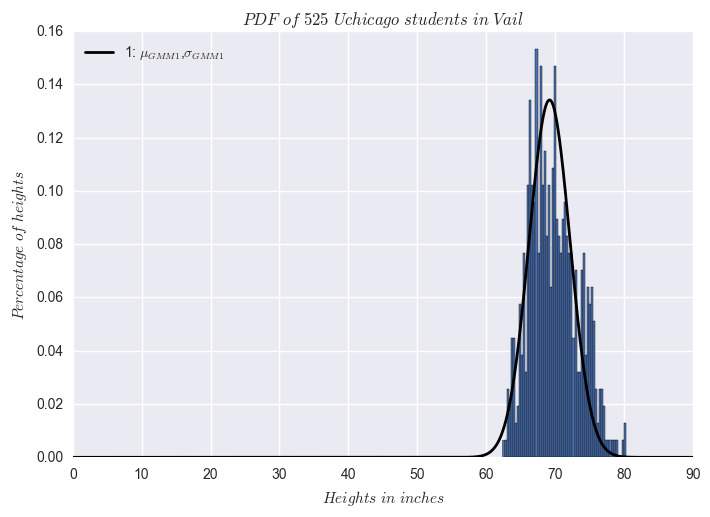

In [73]:
# Plot the histogram of the data
fig, ax = plt.subplots()

def plt_dt():
    plt.hist(dt, 60, normed=True)

plt_dt()
plt.title(r'$PDF\ of\ 525\ Uchicago\ students\ in\ Vail$')
plt.xlabel(r'$Heights\ in\ inches$')
plt.ylabel(r'$Percentage\ of\ heights$')

# Plot the estimated GMM PDF
dist_pts = np.linspace(0, 90, 800)
plt.plot(dist_pts, trunc_norm_pdf(dist_pts, mu_GMM1_4, sig_GMM1_4, 90),
         linewidth=2, color='k', label='1: $\mu_{GMM1}$,$\sigma_{GMM1}$')
plt.legend(loc='upper left')
plt.show()

In [74]:
# (b) Two-step GMM

err1_4 = err_vec4(dt, mu_GMM1_4, sig_GMM1_4, 90, 'Ture')
VCV2_4 = np.dot(err1_4, err1_4.T) / dt.shape[0]

print('VCV Matrix: ')
print(VCV2_4)
W_hat2_4 = lin.pinv(VCV2_4)  
print('W_hat (inverted VCV): ')
print(W_hat2_4)

VCV Matrix: 
[[  5.23734839e-07   7.33391570e-08   4.33788767e-07  -1.03086276e-06]
 [  7.33391570e-08   1.02697616e-08   6.07439111e-08  -1.44352830e-07]
 [  4.33788767e-07   6.07439111e-08   3.59290008e-07  -8.53822686e-07]
 [ -1.03086276e-06  -1.44352830e-07  -8.53822686e-07   2.02903828e-06]]
W_hat (inverted VCV): 
[[  61327.05261319    8587.69363251   50794.76210787 -120709.50835357]
 [   8587.69363251    1202.54404514    7112.84558007  -16903.08325771]
 [  50794.76210787    7112.84558007   42071.28416668  -99978.89185461]
 [-120709.50835357  -16903.08325771  -99978.89185461  237591.48346589]]


In [71]:
params_init = np.array([mu_GMM1_4, sig_GMM1_4])
gmm_args = (dt, 90, W_hat2_4)
results2_4 = opt.minimize(criterion4, params_init, args=(gmm_args),
                       method='L-BFGS-B', bounds=((1e-10, None), (1e-10, None)))
mu_GMM2_4, sig_GMM2_4 = results2_4.x
print('mu_GMM2_4=', mu_GMM2_4, ' sig_GMM2_4=', sig_GMM2_4)
results2_4

mu_GMM2_4= 68.432275272  sig_GMM2_4= 1.9772858965


      fun: array([[  6.08896348e-14]])
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -9.18622682e-06,   1.30284043e-07])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 30
      nit: 7
   status: 0
  success: True
        x: array([ 68.43227527,   1.9772859 ])

In [72]:
print(data_moments4(dt))
print(model_moments4(mu_GMM1_4, sig_GMM1_4, 90))
params = np.array([mu_GMM1_4, sig_GMM1_4])
print(criterion4(params, dt, 90, np.eye(4)))

(0.12380952380952381, 0.3295238095238095, 0.5028571428571429, 0.04380952380952381)
(0.140391465503922, 0.33184579678776177, 0.5165913066195186, 0.011171431088797751)
[[ 0.00153422]]


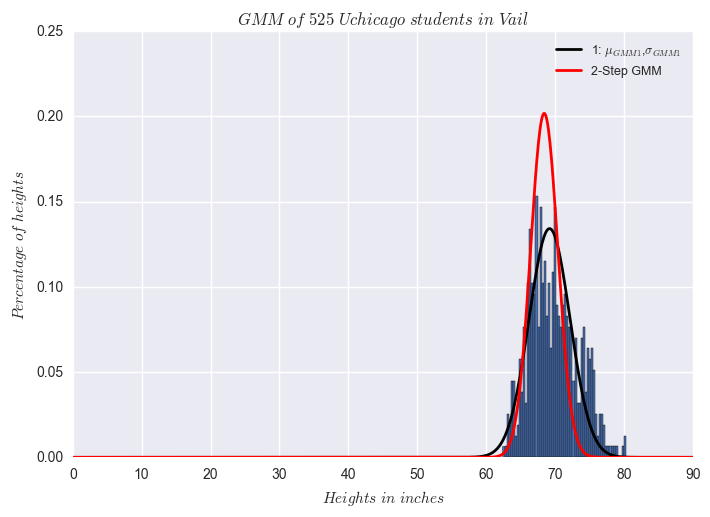

In [82]:
plt.subplots()

def plt_dt():
    plt.hist(dt, 60, normed=True)

plt_dt()
plt.plot(dist_pts, trunc_norm_pdf(dist_pts, mu_GMM1_4, sig_GMM1_4, 90),
         linewidth=2, color='k', label='1: $\mu_{GMM1}$,$\sigma_{GMM1}$')
plt.plot(dist_pts, trunc_norm_pdf(dist_pts, mu_GMM2_4, sig_GMM2_4, 90),
         linewidth=2, color='r', label = '2-Step GMM')
plt.legend(prop = {'size': 9})
plt.title(r'$GMM\ of\ 525\ Uchicago\ students\ in\ Vail$')
plt.xlabel(r'$Heights\ in\ inches$')
plt.ylabel(r'$Percentage\ of\ heights$')
plt.show()